In [1]:
import matplotlib.pyplot as plt
import numpy as np

sampling rate: 7.957747154594767
frecuencia nyquist (max que podemos leer): 3.9788735772973833


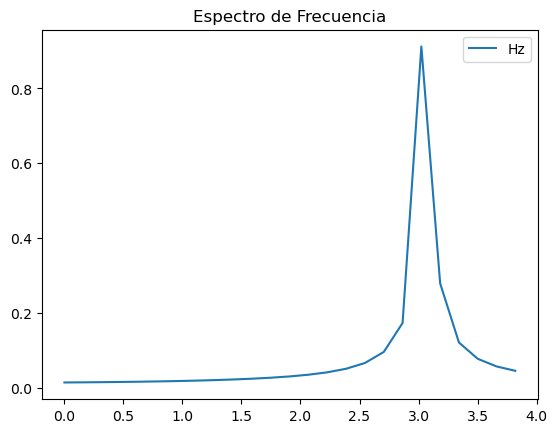

In [6]:

# y = 1*np.sin(2*np.pi* 3*x) + 2*np.cos(2*np.pi* 5*x)
t = np.linspace(0, 2* np.pi, 50)
T = np.max(t) - np.min(t)

f = 1 / T

y = np.exp(1j*2*np.pi* 3 * t)

# datos
data = y
N = len(y) 

print('sampling rate:', N/T)
print('frecuencia nyquist (max que podemos leer):', N/2/T)

# fourier transform
ft = np.fft.fft(data)
mgft = abs(ft) / N

# al multiplicarlo por el samplingRate  N/T
# o cuantos puntos existen en un solo intervalo de tiempo
fVals = np.fft.fftfreq( len(data) ) * N / T

# hasta la 2da 
plt.plot(fVals[:int(len(mgft)/2)], mgft[:int(len(mgft)/2)], label='Hz')

plt.legend()
plt.title('Espectro de Frecuencia')
plt.show()


En el caso de sinusoidales lo mejor es preparar un arreglo y multiplicarlo por el samplingrate

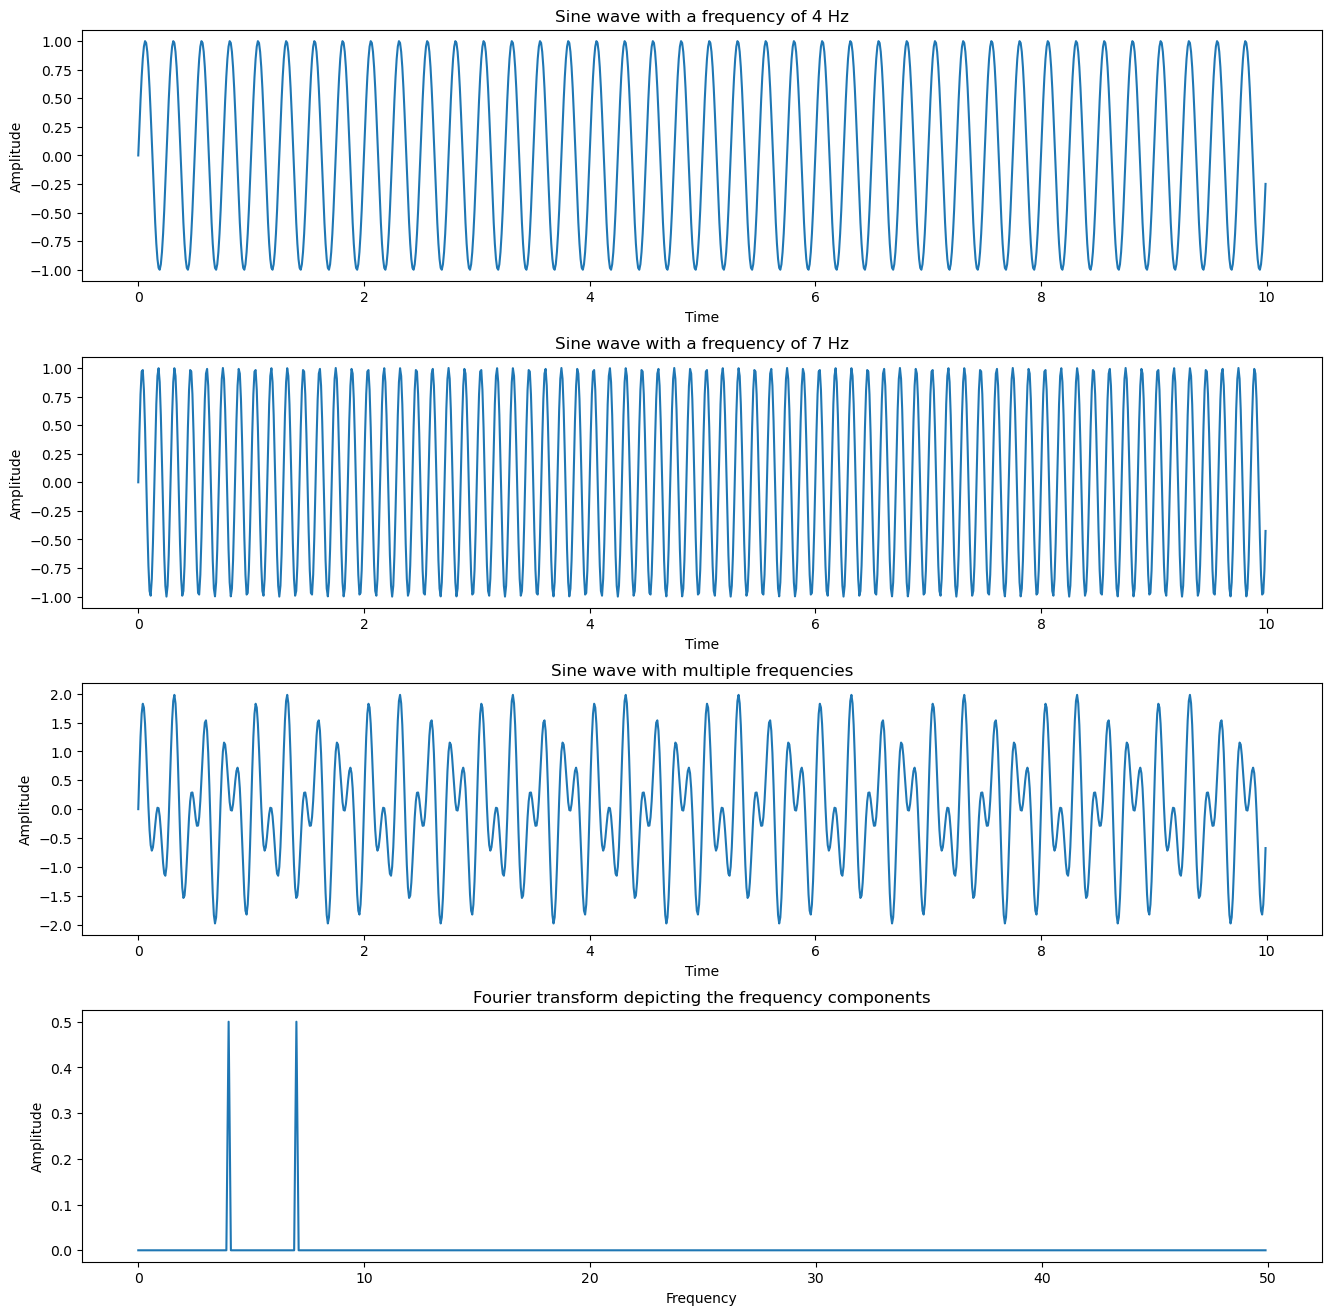

In [1]:
import numpy as np
import matplotlib.pyplot as plt

 
# Sampling Frequency
# la cantidad de puntos, el N
samplingFrequency = 100;

# At what intervals time points are sampled
samplingInterval  = 1 / samplingFrequency;

# Begin time period of the signals
beginTime = 0;
endTime = 10; 
 

# Frequency of the signals
signal1Frequency = 4;
signal2Frequency = 7;

# Time points
time = np.arange(beginTime, endTime, samplingInterval);
# time = np.linspace(beginTime, endTime, samplingFrequency)

# Create two sine waves
amplitude1 = np.sin(2*np.pi* signal1Frequency *time)
amplitude2 = np.sin(2*np.pi* signal2Frequency *time)


# Create subplot
figure, axis = plt.subplots(4, 1, figsize=(16,16))
plt.subplots_adjust(hspace=0.3)


# Sinusoidales agregadas
amplitude = amplitude1 + amplitude2

 
# --------------------------------------------
# La representacion en frecuencias
N = len(amplitude)

fourierTransform = np.fft.fft(amplitude) / N     # se normaliza la FFT

# Teorema Shannon Nyquist
# Sea la mayor frecuencia de la funcion omegaHz
# Podemos determinar todas las frecuencias con un sampling de 2*omegaHz

# sampling es de 100Hz -> determino hasta 50Hz
fourierTransform = fourierTransform[ range(int(N/2)) ]

values      = np.arange(int(N/2))
timePeriod  = N / samplingFrequency
frequencies = values / timePeriod

 

# Time domain representation for sine wave 1
axis[0].set_title('Sine wave with a frequency of 4 Hz')
axis[0].plot(time, amplitude1)
axis[0].set_xlabel('Time')
axis[0].set_ylabel('Amplitude')

# Time domain representation for sine wave 2
axis[1].set_title('Sine wave with a frequency of 7 Hz')
axis[1].plot(time, amplitude2)
axis[1].set_xlabel('Time')
axis[1].set_ylabel('Amplitude')

 # La representacion temporal
axis[2].set_title('Sine wave with multiple frequencies')
axis[2].plot(time, amplitude)
axis[2].set_xlabel('Time')
axis[2].set_ylabel('Amplitude')


# Frequency domain representation
axis[3].set_title('Fourier transform depicting the frequency components')
axis[3].plot(frequencies, abs(fourierTransform))
axis[3].set_xlabel('Frequency')
axis[3].set_ylabel('Amplitude')

 

plt.show()